In [ ]:
# %%

import torch
from util.gpu_info import gpuInfo
from util.data_augmentation import data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import test
from util.data_load import data_load

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *

training_data_processing = False
model_training = True
model_validation = True
model_loading = False

batch_size = 4

path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/DLinkNet101.model"

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

gpu_info = gpuInfo()

model = DLinkNet101()
if cuda_available:
    model.cuda()

print(model)

Wed Jan  8 16:47:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8             14W /  340W |     628MiB /  16376MiB |     15%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DLinkNet101(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256

In [ ]:
# %%

if training_data_processing:
    training_resize = 512
    training_number = 367
    testing_resize = int(608 * training_resize / 400)
    if testing_resize % 2 == 1:
        testing_resize += 1

    data_augmentation(
        training_resize,
        training_number,
        testing_resize,
    )

In [ ]:
# %%

if not model_loading:
    training_generator, validation_generator = data_load(
        path_data, model_validation, batch_size
    )


 Fim do Carregamento Training Data

 Fim do Carregamento Validation Data

 Fim do Carregamento


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.3984866440296173
→ ACC for Batch 1: 0.15654850006103516
→ Recall for Batch 1: 0.827858978477353
→ Running_loss for Batch 21: 0.3756329417228699
→ ACC for Batch 21: 0.9753808975219727
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.32481250166893005
→ ACC for Batch 41: 0.9730014801025391
→ Recall for Batch 41: 0.20749155664722138
→ Running_loss for Batch 61: 0.2855668067932129
→ ACC for Batch 61: 0.9758052825927734
→ Recall for Batch 61: 0.8378742423314761
→ Running_loss for Batch 81: 0.2653200030326843
→ ACC for Batch 81: 0.9767446517944336
→ Recall for Batch 81: 0.6960057534852844
→ Running_loss for Batch 101: 0.2531583309173584
→ ACC for Batch 101: 0.9797296524047852
→ Recall for Batch 101: 0.4682608531663712
→ Running_loss for Batch 121: 0.2242051512002945
→ ACC for Batch 121: 0.9773445129394531
→ Recall for Batch 121: 0.559929564854056
→ Running_loss for Batch 141: 0.25657761096954346
→ ACC fo

  1%|          | 1/100 [09:15<15:16:47, 555.63s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.21038740873336792
→ ACC for Batch 1: 0.9818210601806641
→ Recall for Batch 1: 0.6909301674861095
→ Running_loss for Batch 21: 0.20430845022201538
→ ACC for Batch 21: 0.9847507476806641
→ Recall for Batch 21: 0.7965083440308087
→ Running_loss for Batch 41: 0.18284857273101807
→ ACC for Batch 41: 0.9669275283813477
→ Recall for Batch 41: 0.7509916026442737
→ Running_loss for Batch 61: 0.17539547383785248
→ ACC for Batch 61: 0.9804916381835938
→ Recall for Batch 61: 0.7088161750867099
→ Running_loss for Batch 81: 0.20911471545696259
→ ACC for Batch 81: 0.9784040451049805
→ Recall for Batch 81: 0.7318089502065971
→ Running_loss for Batch 101: 0.2298366129398346
→ ACC for Batch 101: 0.9702425003051758
→ Recall for Batch 101: 0.5401192113709308
→ Running_loss for Batch 121: 0.20237891376018524
→ ACC for Batch 121: 0.975672721862793
→ Recall for Batch 121: 0.6003201070208547
→ Running_loss for Batch 141: 0.2044453

  2%|▏         | 2/100 [18:12<14:49:53, 544.83s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.1748265027999878
→ ACC for Batch 1: 0.9871091842651367
→ Recall for Batch 1: 0.7309171473957027
→ Running_loss for Batch 21: 0.15703046321868896
→ ACC for Batch 21: 0.9778528213500977
→ Recall for Batch 21: 0.7115222049658915
→ Running_loss for Batch 41: 0.1629776954650879
→ ACC for Batch 41: 0.977665901184082
→ Recall for Batch 41: 0.6716119156952784
→ Running_loss for Batch 61: 0.17657732963562012
→ ACC for Batch 61: 0.9835672378540039
→ Recall for Batch 61: 0.7943820630393184
→ Running_loss for Batch 81: 0.1602124720811844
→ ACC for Batch 81: 0.9804887771606445
→ Recall for Batch 81: 0.74077817079333
→ Running_loss for Batch 101: 0.17829887568950653
→ ACC for Batch 101: 0.9903688430786133
→ Recall for Batch 101: 0.7048290526551396
→ Running_loss for Batch 121: 0.13718846440315247
→ ACC for Batch 121: 0.9915657043457031
→ Recall for Batch 121: 0.809318009118541
→ Running_loss for Batch 141: 0.138543799519

  3%|▎         | 3/100 [27:08<14:33:41, 540.43s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.16925950348377228
→ ACC for Batch 1: 0.984807014465332
→ Recall for Batch 1: 0.7014363003993301
→ Running_loss for Batch 21: 0.20788344740867615
→ ACC for Batch 21: 0.9917669296264648
→ Recall for Batch 21: 0.6736647631844138
→ Running_loss for Batch 41: 0.16134695708751678
→ ACC for Batch 41: 0.9843711853027344
→ Recall for Batch 41: 0.7068915297681463
→ Running_loss for Batch 61: 0.13946367800235748
→ ACC for Batch 61: 0.9902257919311523
→ Recall for Batch 61: 0.8365648555618491
→ Running_loss for Batch 81: 0.168619304895401
→ ACC for Batch 81: 0.9816684722900391
→ Recall for Batch 81: 0.7349711623779946
→ Running_loss for Batch 101: 0.14982448518276215
→ ACC for Batch 101: 0.987823486328125
→ Recall for Batch 101: 0.7572393310469187
→ Running_loss for Batch 121: 0.19458910822868347
→ ACC for Batch 121: 0.9856653213500977
→ Recall for Batch 121: 0.7259155691863611
→ Running_loss for Batch 141: 0.127368792

  4%|▍         | 4/100 [35:48<14:12:16, 532.67s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.17992275953292847
→ ACC for Batch 1: 0.9864721298217773
→ Recall for Batch 1: 0.6657750945703259
→ Running_loss for Batch 21: 0.13735809922218323
→ ACC for Batch 21: 0.9794158935546875
→ Recall for Batch 21: 0.7276428471149796
→ Running_loss for Batch 41: 0.16230562329292297
→ ACC for Batch 41: 0.9823579788208008
→ Recall for Batch 41: 0.7734758085088291
→ Running_loss for Batch 61: 0.13042651116847992
→ ACC for Batch 61: 0.9870567321777344
→ Recall for Batch 61: 0.8242751496654537
→ Running_loss for Batch 81: 0.12973426282405853
→ ACC for Batch 81: 0.9773435592651367
→ Recall for Batch 81: 0.7904299077294455
→ Running_loss for Batch 101: 0.13130544126033783
→ ACC for Batch 101: 0.979278564453125
→ Recall for Batch 101: 0.8077966714905933
→ Running_loss for Batch 121: 0.1356009542942047
→ ACC for Batch 121: 0.9904584884643555
→ Recall for Batch 121: 0.8054604693364128
→ Running_loss for Batch 141: 0.1574409

  5%|▌         | 5/100 [44:20<13:51:37, 525.24s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.17008736729621887
→ ACC for Batch 1: 0.9932832717895508
→ Recall for Batch 1: 0.6860766791582589
→ Running_loss for Batch 21: 0.16304515302181244
→ ACC for Batch 21: 0.9808855056762695
→ Recall for Batch 21: 0.7601766956879061
→ Running_loss for Batch 41: 0.14287112653255463
→ ACC for Batch 41: 0.9778108596801758
→ Recall for Batch 41: 0.7719166681908803
→ Running_loss for Batch 61: 0.1705167591571808
→ ACC for Batch 61: 0.9908084869384766
→ Recall for Batch 61: 0.670214964861513
→ Running_loss for Batch 81: 0.1395377516746521
→ ACC for Batch 81: 0.9869318008422852
→ Recall for Batch 81: 0.8288989344526961
→ Running_loss for Batch 101: 0.16128291189670563
→ ACC for Batch 101: 0.9948558807373047
→ Recall for Batch 101: 0.8178746928746928
→ Running_loss for Batch 121: 0.1384955197572708
→ ACC for Batch 121: 0.9907264709472656
→ Recall for Batch 121: 0.7764795208166364
→ Running_loss for Batch 141: 0.117403768

  6%|▌         | 6/100 [53:02<13:40:45, 523.89s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.14023569226264954
→ ACC for Batch 1: 0.9956626892089844
→ Recall for Batch 1: 0.8244207644931079
→ Running_loss for Batch 21: 0.134437695145607
→ ACC for Batch 21: 0.9903020858764648
→ Recall for Batch 21: 0.8085541347657033
→ Running_loss for Batch 41: 0.16719496250152588
→ ACC for Batch 41: 0.9956588745117188
→ Recall for Batch 41: 0.7204460120605302
→ Running_loss for Batch 61: 0.10845527052879333
→ ACC for Batch 61: 0.9899797439575195
→ Recall for Batch 61: 0.8909725936880526
→ Running_loss for Batch 81: 0.13600702583789825
→ ACC for Batch 81: 0.9937286376953125
→ Recall for Batch 81: 0.79759381623239
→ Running_loss for Batch 101: 0.150551438331604
→ ACC for Batch 101: 0.9894857406616211
→ Recall for Batch 101: 0.8096056400088125
→ Running_loss for Batch 121: 0.12343483418226242
→ ACC for Batch 121: 0.9888248443603516
→ Recall for Batch 121: 0.804517252972279
→ Running_loss for Batch 141: 0.102175801992

  7%|▋         | 7/100 [1:01:31<13:24:26, 519.00s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.09627996385097504
→ ACC for Batch 1: 0.9859218597412109
→ Recall for Batch 1: 0.8566064003223974
→ Running_loss for Batch 21: 0.09406699240207672
→ ACC for Batch 21: 0.9900522232055664
→ Recall for Batch 21: 0.895553746356068
→ Running_loss for Batch 41: 0.11136921495199203
→ ACC for Batch 41: 0.9926319122314453
→ Recall for Batch 41: 0.889922480620155
→ Running_loss for Batch 61: 0.13932736217975616
→ ACC for Batch 61: 0.9851398468017578
→ Recall for Batch 61: 0.8288448009005206
→ Running_loss for Batch 81: 0.11836713552474976
→ ACC for Batch 81: 0.9960851669311523
→ Recall for Batch 81: 0.8174450664215891
→ Running_loss for Batch 101: 0.11026415973901749
→ ACC for Batch 101: 0.9876747131347656
→ Recall for Batch 101: 0.8261807778101057
→ Running_loss for Batch 121: 0.13758988678455353
→ ACC for Batch 121: 0.9882869720458984
→ Recall for Batch 121: 0.7574260622497739
→ Running_loss for Batch 141: 0.1515425

  8%|▊         | 8/100 [1:10:05<13:13:21, 517.41s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.10934948176145554
→ ACC for Batch 1: 0.9879140853881836
→ Recall for Batch 1: 0.8506220937539274
→ Running_loss for Batch 21: 0.10140170902013779
→ ACC for Batch 21: 0.9915065765380859
→ Recall for Batch 21: 0.8399179723797623
→ Running_loss for Batch 41: 0.13886655867099762
→ ACC for Batch 41: 0.9931526184082031
→ Recall for Batch 41: 0.7932514255481747
→ Running_loss for Batch 61: 0.12502707540988922
→ ACC for Batch 61: 0.9972381591796875
→ Recall for Batch 61: 0.8457869634340223
→ Running_loss for Batch 81: 0.1149706169962883
→ ACC for Batch 81: 0.9940814971923828
→ Recall for Batch 81: 0.8455672591617293
→ Running_loss for Batch 101: 0.10031316429376602
→ ACC for Batch 101: 0.9922456741333008
→ Recall for Batch 101: 0.8818349820632677
→ Running_loss for Batch 121: 0.1014191284775734
→ ACC for Batch 121: 0.9917678833007812
→ Recall for Batch 121: 0.8464786859080934
→ Running_loss for Batch 141: 0.1003870

  9%|▉         | 9/100 [1:18:33<13:00:27, 514.59s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.08312136679887772
→ ACC for Batch 1: 0.9944705963134766
→ Recall for Batch 1: 0.8922370382306731
→ Running_loss for Batch 21: 0.12046309560537338
→ ACC for Batch 21: 0.9861764907836914
→ Recall for Batch 21: 0.8275482767049621
→ Running_loss for Batch 41: 0.10924012959003448
→ ACC for Batch 41: 0.9914999008178711
→ Recall for Batch 41: 0.8461538461538461
→ Running_loss for Batch 61: 0.10135824978351593
→ ACC for Batch 61: 0.9947061538696289
→ Recall for Batch 61: 0.89629750982962
→ Running_loss for Batch 81: 0.1019345372915268
→ ACC for Batch 81: 0.9917440414428711
→ Recall for Batch 81: 0.8760677872692202
→ Running_loss for Batch 101: 0.12382142245769501
→ ACC for Batch 101: 0.9910078048706055
→ Recall for Batch 101: 0.8319506992178242
→ Running_loss for Batch 121: 0.11480237543582916
→ ACC for Batch 121: 0.9942836761474609
→ Recall for Batch 121: 0.8489151425650346
→ Running_loss for Batch 141: 0.0970826

 10%|█         | 10/100 [1:26:40<12:39:11, 506.13s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.10910012573003769
→ ACC for Batch 1: 0.9880037307739258
→ Recall for Batch 1: 0.8735439212748922
→ Running_loss for Batch 21: 0.1127556636929512
→ ACC for Batch 21: 0.9933929443359375
→ Recall for Batch 21: 0.8293954624453943
→ Running_loss for Batch 41: 0.1247815191745758
→ ACC for Batch 41: 0.9924821853637695
→ Recall for Batch 41: 0.8057023643949931
→ Running_loss for Batch 61: 0.10159974545240402
→ ACC for Batch 61: 0.9925384521484375
→ Recall for Batch 61: 0.887793987451403
→ Running_loss for Batch 81: 0.11648838222026825
→ ACC for Batch 81: 0.9922513961791992
→ Recall for Batch 81: 0.8262427601150047
→ Running_loss for Batch 101: 0.09098203480243683
→ ACC for Batch 101: 0.9924345016479492
→ Recall for Batch 101: 0.9031106067685736
→ Running_loss for Batch 121: 0.10316026210784912
→ ACC for Batch 121: 0.9935102462768555
→ Recall for Batch 121: 0.8410172835270403
→ Running_loss for Batch 141: 0.1039975

 11%|█         | 11/100 [1:35:22<12:37:39, 510.79s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.11218447983264923
→ ACC for Batch 1: 0.9878101348876953
→ Recall for Batch 1: 0.8516381619616732
→ Running_loss for Batch 21: 0.08675102144479752
→ ACC for Batch 21: 0.9935731887817383
→ Recall for Batch 21: 0.8831318780443803
→ Running_loss for Batch 41: 0.08584877103567123
→ ACC for Batch 41: 0.9938774108886719
→ Recall for Batch 41: 0.887396733184956
→ Running_loss for Batch 61: 0.11106092482805252
→ ACC for Batch 61: 0.9928836822509766
→ Recall for Batch 61: 0.8250265111346765
→ Running_loss for Batch 81: 0.09154380112886429
→ ACC for Batch 81: 0.995142936706543
→ Recall for Batch 81: 0.9046168391197017
→ Running_loss for Batch 101: 0.07225895673036575
→ ACC for Batch 101: 0.9914522171020508
→ Recall for Batch 101: 0.8893123951821924
→ Running_loss for Batch 121: 0.09218450635671616
→ ACC for Batch 121: 0.9954442977905273
→ Recall for Batch 121: 0.9037569310852099
→ Running_loss for Batch 141: 0.084798

 12%|█▏        | 12/100 [1:44:15<12:39:09, 517.61s/it]

Validation loss for Epoch 12: 0.11228233575820923

Acurácia de validação:  0.9879942876952035
F1-score de validação:  0.7706289942269658
IoU de validação:  0.9788007794445134
Recall de validação:  0.7984350575250599

---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.08715116232633591
→ ACC for Batch 1: 0.9940299987792969
→ Recall for Batch 1: 0.8953562088913543
→ Running_loss for Batch 21: 0.07931828498840332
→ ACC for Batch 21: 0.9891366958618164
→ Recall for Batch 21: 0.893238227789376
→ Running_loss for Batch 41: 0.09262692928314209
→ ACC for Batch 41: 0.9951763153076172
→ Recall for Batch 41: 0.8706851871047995
→ Running_loss for Batch 61: 0.08582188189029694
→ ACC for Batch 61: 0.9886589050292969
→ Recall for Batch 61: 0.8938195605202006
→ Running_loss for Batch 81: 0.08133948594331741
→ ACC for Batch 81: 0.992767333984375
→ Recall for Batch 81: 0.8906390101022177
→ Running_loss for Batch 101: 0.07427319884300232
→ ACC for Batch 101: 0.986572265625
→ 

 13%|█▎        | 13/100 [1:53:17<12:41:11, 524.95s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.09405636042356491
→ ACC for Batch 1: 0.985468864440918
→ Recall for Batch 1: 0.8924514991181658
→ Running_loss for Batch 21: 0.08143730461597443
→ ACC for Batch 21: 0.9933481216430664
→ Recall for Batch 21: 0.8880906148867314
→ Running_loss for Batch 41: 0.09570787847042084
→ ACC for Batch 41: 0.9947290420532227
→ Recall for Batch 41: 0.8712841854934602
→ Running_loss for Batch 61: 0.0859922468662262
→ ACC for Batch 61: 0.9950590133666992
→ Recall for Batch 61: 0.8891761056539925
→ Running_loss for Batch 81: 0.0980398878455162
→ ACC for Batch 81: 0.9934520721435547
→ Recall for Batch 81: 0.8596412919980523
→ Running_loss for Batch 101: 0.07190351188182831
→ ACC for Batch 101: 0.9915828704833984
→ Recall for Batch 101: 0.8957885165554101
→ Running_loss for Batch 121: 0.09865455329418182
→ ACC for Batch 121: 0.99151611328125
→ Recall for Batch 121: 0.8636378017527763
→ Running_loss for Batch 141: 0.074617810

 14%|█▍        | 14/100 [2:01:44<12:24:46, 519.61s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.09165247529745102
→ ACC for Batch 1: 0.994654655456543
→ Recall for Batch 1: 0.8963850855166532
→ Running_loss for Batch 21: 0.11156193166971207
→ ACC for Batch 21: 0.9842643737792969
→ Recall for Batch 21: 0.8312191953539908
→ Running_loss for Batch 41: 0.08410889655351639
→ ACC for Batch 41: 0.9946260452270508
→ Recall for Batch 41: 0.8790111124984392
→ Running_loss for Batch 61: 0.10338754206895828
→ ACC for Batch 61: 0.9929971694946289
→ Recall for Batch 61: 0.8373460468812078
→ Running_loss for Batch 81: 0.07897503674030304
→ ACC for Batch 81: 0.9912290573120117
→ Recall for Batch 81: 0.8972254693799652
→ Running_loss for Batch 101: 0.09413261711597443
→ ACC for Batch 101: 0.9932966232299805
→ Recall for Batch 101: 0.8713376766868595
→ Running_loss for Batch 121: 0.08397803455591202
→ ACC for Batch 121: 0.9949588775634766
→ Recall for Batch 121: 0.889958365044545
→ Running_loss for Batch 141: 0.084145

 15%|█▌        | 15/100 [2:10:23<12:15:49, 519.40s/it]

Validation loss for Epoch 15: 0.10748185217380524

Acurácia de validação:  0.9887874569211688
F1-score de validação:  0.785374963288786
IoU de validação:  0.9800835300399693
Recall de validação:  0.8121843376152873

---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.06384618580341339
→ ACC for Batch 1: 0.9949674606323242
→ Recall for Batch 1: 0.9168116037147639
→ Running_loss for Batch 21: 0.09904634207487106
→ ACC for Batch 21: 0.9950408935546875
→ Recall for Batch 21: 0.8439402028830753
→ Running_loss for Batch 41: 0.07798269391059875
→ ACC for Batch 41: 0.9935407638549805
→ Recall for Batch 41: 0.9040852575488455
→ Running_loss for Batch 61: 0.07240516692399979
→ ACC for Batch 61: 0.9924249649047852
→ Recall for Batch 61: 0.902209461989764
→ Running_loss for Batch 81: 0.0980837494134903
→ ACC for Batch 81: 0.9945898056030273
→ Recall for Batch 81: 0.8901020770910568
→ Running_loss for Batch 101: 0.0900954157114029
→ ACC for Batch 101: 0.9969301223754883


 16%|█▌        | 16/100 [2:18:44<11:59:28, 513.91s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.07164742797613144
→ ACC for Batch 1: 0.9959268569946289
→ Recall for Batch 1: 0.8880539586256847
→ Running_loss for Batch 21: 0.08803188800811768
→ ACC for Batch 21: 0.9968976974487305
→ Recall for Batch 21: 0.8837600305693543
→ Running_loss for Batch 41: 0.11367727816104889
→ ACC for Batch 41: 0.9910221099853516
→ Recall for Batch 41: 0.8458836053938964
→ Running_loss for Batch 61: 0.07696867734193802
→ ACC for Batch 61: 0.9924106597900391
→ Recall for Batch 61: 0.9240983065757642
→ Running_loss for Batch 81: 0.08585845679044724
→ ACC for Batch 81: 0.9971342086791992
→ Recall for Batch 81: 0.8952667045546805
→ Running_loss for Batch 101: 0.09333927929401398
→ ACC for Batch 101: 0.99713134765625
→ Recall for Batch 101: 0.8758535071384234
→ Running_loss for Batch 121: 0.10739345848560333
→ ACC for Batch 121: 0.9929733276367188
→ Recall for Batch 121: 0.8590833368929136
→ Running_loss for Batch 141: 0.101042

 17%|█▋        | 17/100 [2:27:31<11:56:12, 517.74s/it]

Validation loss for Epoch 17: 0.10132347792387009

Acurácia de validação:  0.9892219285003278
F1-score de validação:  0.7935791758817626
IoU de validação:  0.9807901836493078
Recall de validação:  0.8196870901854385

---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.07692394405603409
→ ACC for Batch 1: 0.9943466186523438
→ Recall for Batch 1: 0.9116076653013458
→ Running_loss for Batch 21: 0.0825614407658577
→ ACC for Batch 21: 0.9898624420166016
→ Recall for Batch 21: 0.9101195606532742
→ Running_loss for Batch 41: 0.08056291937828064
→ ACC for Batch 41: 0.9887199401855469
→ Recall for Batch 41: 0.8984440069660029
→ Running_loss for Batch 61: 0.07646945118904114
→ ACC for Batch 61: 0.9936313629150391
→ Recall for Batch 61: 0.9061272709856637
→ Running_loss for Batch 81: 0.07587214559316635
→ ACC for Batch 81: 0.9891805648803711
→ Recall for Batch 81: 0.8959985315712188
→ Running_loss for Batch 101: 0.10115109384059906
→ ACC for Batch 101: 0.99281787872314

 18%|█▊        | 18/100 [2:36:31<11:56:57, 524.61s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.10988109558820724
→ ACC for Batch 1: 0.9953365325927734
→ Recall for Batch 1: 0.8526876768208435
→ Running_loss for Batch 21: 0.09643644839525223
→ ACC for Batch 21: 0.9969615936279297
→ Recall for Batch 21: 0.8614225798168279
→ Running_loss for Batch 41: 0.0655248761177063
→ ACC for Batch 41: 0.9945659637451172
→ Recall for Batch 41: 0.9193355940718413
→ Running_loss for Batch 61: 0.06622704118490219
→ ACC for Batch 61: 0.9906864166259766
→ Recall for Batch 61: 0.9226503916789163
→ Running_loss for Batch 81: 0.09582336246967316
→ ACC for Batch 81: 0.9924964904785156
→ Recall for Batch 81: 0.8665053577601106
→ Running_loss for Batch 101: 0.08676853030920029
→ ACC for Batch 101: 0.989227294921875
→ Recall for Batch 101: 0.8866028295376122
→ Running_loss for Batch 121: 0.08109240233898163
→ ACC for Batch 121: 0.9874782562255859
→ Recall for Batch 121: 0.8950601484514973
→ Running_loss for Batch 141: 0.091604

 19%|█▉        | 19/100 [2:44:59<11:41:19, 519.50s/it]

Validation loss for Epoch 19: 0.10034305602312088

Acurácia de validação:  0.9895758521287961
F1-score de validação:  0.800260039306227
IoU de validação:  0.98136878341166
Recall de validação:  0.826117786784895

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.08005157113075256
→ ACC for Batch 1: 0.9903974533081055
→ Recall for Batch 1: 0.914772599029455
→ Running_loss for Batch 21: 0.09213593602180481
→ ACC for Batch 21: 0.9980640411376953
→ Recall for Batch 21: 0.8933770491803279
→ Running_loss for Batch 41: 0.08723074197769165
→ ACC for Batch 41: 0.9945573806762695
→ Recall for Batch 41: 0.8745684695051784
→ Running_loss for Batch 61: 0.0724530890583992
→ ACC for Batch 61: 0.9964303970336914
→ Recall for Batch 61: 0.9047491710343353
→ Running_loss for Batch 81: 0.07910707592964172
→ ACC for Batch 81: 0.9950923919677734
→ Recall for Batch 81: 0.9117942010028341
→ Running_loss for Batch 101: 0.06855332851409912
→ ACC for Batch 101: 0.9933996200561523
→ 

 20%|██        | 20/100 [2:53:33<11:30:33, 517.92s/it]


---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.07718037068843842
→ ACC for Batch 1: 0.991490364074707
→ Recall for Batch 1: 0.8845681635736884
→ Running_loss for Batch 21: 0.06163082271814346
→ ACC for Batch 21: 0.9949665069580078
→ Recall for Batch 21: 0.9119776809504404
→ Running_loss for Batch 41: 0.08577326685190201
→ ACC for Batch 41: 0.9976005554199219
→ Recall for Batch 41: 0.8696798493408663
→ Running_loss for Batch 61: 0.08386850357055664
→ ACC for Batch 61: 0.990483283996582
→ Recall for Batch 61: 0.8961115707363195
→ Running_loss for Batch 81: 0.06521683931350708
→ ACC for Batch 81: 0.99432373046875
→ Recall for Batch 81: 0.9235255215535382
→ Running_loss for Batch 101: 0.10063430666923523
→ ACC for Batch 101: 0.990025520324707
→ Recall for Batch 101: 0.8684035844673084
→ Running_loss for Batch 121: 0.09516148269176483
→ ACC for Batch 121: 0.9935150146484375
→ Recall for Batch 121: 0.8881664499349805
→ Running_loss for Batch 141: 0.079034760

 21%|██        | 21/100 [3:02:55<11:39:26, 531.23s/it]


---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.09167329967021942
→ ACC for Batch 1: 0.9929351806640625
→ Recall for Batch 1: 0.8757688006709533
→ Running_loss for Batch 21: 0.10005365312099457
→ ACC for Batch 21: 0.9864645004272461
→ Recall for Batch 21: 0.8876462731495325
→ Running_loss for Batch 41: 0.08695022016763687
→ ACC for Batch 41: 0.99822998046875
→ Recall for Batch 41: 0.8943089430894309
→ Running_loss for Batch 61: 0.056173037737607956
→ ACC for Batch 61: 0.9967660903930664
→ Recall for Batch 61: 0.9386547409314722
→ Running_loss for Batch 81: 0.05855678394436836
→ ACC for Batch 81: 0.9918718338012695
→ Recall for Batch 81: 0.9317105017720575
→ Running_loss for Batch 101: 0.07281992584466934
→ ACC for Batch 101: 0.9923810958862305
→ Recall for Batch 101: 0.9088227880010084
→ Running_loss for Batch 121: 0.09175363183021545
→ ACC for Batch 121: 0.9959087371826172
→ Recall for Batch 121: 0.8621531499345004
→ Running_loss for Batch 141: 0.07812

 22%|██▏       | 22/100 [3:11:14<11:17:49, 521.40s/it]

Validation loss for Epoch 22: 0.09875290840864182

Acurácia de validação:  0.9900065459214248
F1-score de validação:  0.8082979155708628
IoU de validação:  0.9820756329527143
Recall de validação:  0.8338735699567696

---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.1001623272895813
→ ACC for Batch 1: 0.9914398193359375
→ Recall for Batch 1: 0.8785827638695469
→ Running_loss for Batch 21: 0.09618377685546875
→ ACC for Batch 21: 0.9942750930786133
→ Recall for Batch 21: 0.867352981369289
→ Running_loss for Batch 41: 0.08159223198890686
→ ACC for Batch 41: 0.9941310882568359
→ Recall for Batch 41: 0.8944436190759174
→ Running_loss for Batch 61: 0.08077242225408554
→ ACC for Batch 61: 0.9942893981933594
→ Recall for Batch 61: 0.893605022745216
→ Running_loss for Batch 81: 0.07367593050003052
→ ACC for Batch 81: 0.9961280822753906
→ Recall for Batch 81: 0.8883041510918749
→ Running_loss for Batch 101: 0.07107452303171158
→ ACC for Batch 101: 0.9965553283691406

 23%|██▎       | 23/100 [3:19:49<11:06:40, 519.49s/it]


---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.0671602413058281
→ ACC for Batch 1: 0.9938163757324219
→ Recall for Batch 1: 0.9069813176007866
→ Running_loss for Batch 21: 0.07956135272979736
→ ACC for Batch 21: 0.9863214492797852
→ Recall for Batch 21: 0.9051908791225485
→ Running_loss for Batch 41: 0.08550616353750229
→ ACC for Batch 41: 0.9948844909667969
→ Recall for Batch 41: 0.8970755446400146
→ Running_loss for Batch 61: 0.08177636563777924
→ ACC for Batch 61: 0.9922809600830078
→ Recall for Batch 61: 0.9047062845421914
→ Running_loss for Batch 81: 0.1003403291106224
→ ACC for Batch 81: 0.9896421432495117
→ Recall for Batch 81: 0.8575779855057242
→ Running_loss for Batch 101: 0.08595377206802368
→ ACC for Batch 101: 0.9924001693725586
→ Recall for Batch 101: 0.897417019449046
→ Running_loss for Batch 121: 0.05382302775979042
→ ACC for Batch 121: 0.9952774047851562
→ Recall for Batch 121: 0.9371030345800988
→ Running_loss for Batch 141: 0.0717987

 24%|██▍       | 24/100 [3:28:40<11:02:26, 522.98s/it]

Validation loss for Epoch 24: 0.09910380095243454

Acurácia de validação:  0.9902395613136745
F1-score de validação:  0.8126013278512103
IoU de validação:  0.9824591774838484
Recall de validação:  0.8380815531545435

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.06717579066753387
→ ACC for Batch 1: 0.9931144714355469
→ Recall for Batch 1: 0.9272933825617722
→ Running_loss for Batch 21: 0.07474194467067719
→ ACC for Batch 21: 0.9905757904052734
→ Recall for Batch 21: 0.9179540137832198
→ Running_loss for Batch 41: 0.05433644354343414
→ ACC for Batch 41: 0.9926586151123047
→ Recall for Batch 41: 0.9366046936909479
→ Running_loss for Batch 61: 0.08396011590957642
→ ACC for Batch 61: 0.9949865341186523
→ Recall for Batch 61: 0.8865232365702017
→ Running_loss for Batch 81: 0.06559081375598907
→ ACC for Batch 81: 0.9943361282348633
→ Recall for Batch 81: 0.9081333413130648
→ Running_loss for Batch 101: 0.06433427333831787
→ ACC for Batch 101: 0.9944677352905

 25%|██▌       | 25/100 [3:37:11<10:49:04, 519.26s/it]


---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.06318032741546631
→ ACC for Batch 1: 0.9933280944824219
→ Recall for Batch 1: 0.9162910338069574
→ Running_loss for Batch 21: 0.07083462178707123
→ ACC for Batch 21: 0.9959115982055664
→ Recall for Batch 21: 0.9050253991291727
→ Running_loss for Batch 41: 0.08946237713098526
→ ACC for Batch 41: 0.9969139099121094
→ Recall for Batch 41: 0.8786979939114823
→ Running_loss for Batch 61: 0.08011260628700256
→ ACC for Batch 61: 0.9931526184082031
→ Recall for Batch 61: 0.9062146181909674
→ Running_loss for Batch 81: 0.06382863223552704
→ ACC for Batch 81: 0.9923734664916992
→ Recall for Batch 81: 0.9256167646351856
→ Running_loss for Batch 101: 0.061072129756212234
→ ACC for Batch 101: 0.9939785003662109
→ Recall for Batch 101: 0.9172260676505158
→ Running_loss for Batch 121: 0.07441110163927078
→ ACC for Batch 121: 0.9894285202026367
→ Recall for Batch 121: 0.9097242755765819
→ Running_loss for Batch 141: 0.067

 26%|██▌       | 26/100 [3:45:45<10:38:46, 517.93s/it]

Validation loss for Epoch 26: 0.09741832315921783

Acurácia de validação:  0.9904444820278293
F1-score de validação:  0.8164644989598792
IoU de validação:  0.9827950912870346
Recall de validação:  0.8415262211210125

---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.07844860106706619
→ ACC for Batch 1: 0.9966659545898438
→ Recall for Batch 1: 0.8810897042581912
→ Running_loss for Batch 21: 0.06413470208644867
→ ACC for Batch 21: 0.9962615966796875
→ Recall for Batch 21: 0.9160945162728489
→ Running_loss for Batch 41: 0.07491790503263474
→ ACC for Batch 41: 0.9935750961303711
→ Recall for Batch 41: 0.8919165500881941
→ Running_loss for Batch 61: 0.08294807374477386
→ ACC for Batch 61: 0.9882135391235352
→ Recall for Batch 61: 0.8925167797678645
→ Running_loss for Batch 81: 0.07430574297904968
→ ACC for Batch 81: 0.9961214065551758
→ Recall for Batch 81: 0.9113360944930204
→ Running_loss for Batch 101: 0.07265711575746536
→ ACC for Batch 101: 0.9953508377075

 27%|██▋       | 27/100 [3:54:22<10:29:33, 517.44s/it]

Validation loss for Epoch 27: 0.09746631234884262

Acurácia de validação:  0.9905331488008853
F1-score de validação:  0.8181597718158592
IoU de validação:  0.9829421760869547
Recall de validação:  0.8433284210453778

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.099159374833107
→ ACC for Batch 1: 0.9894514083862305
→ Recall for Batch 1: 0.8962901165367468
→ Running_loss for Batch 21: 0.07788842916488647
→ ACC for Batch 21: 0.9947319030761719
→ Recall for Batch 21: 0.9007633587786259
→ Running_loss for Batch 41: 0.08070371299982071
→ ACC for Batch 41: 0.9931344985961914
→ Recall for Batch 41: 0.9019447158571564
→ Running_loss for Batch 61: 0.06719499826431274
→ ACC for Batch 61: 0.992274284362793
→ Recall for Batch 61: 0.9084777770283942
→ Running_loss for Batch 81: 0.09928717464208603
→ ACC for Batch 81: 0.9967737197875977
→ Recall for Batch 81: 0.8378466557911909
→ Running_loss for Batch 101: 0.06870729476213455
→ ACC for Batch 101: 0.9947023391723633

 28%|██▊       | 28/100 [4:03:04<10:22:32, 518.79s/it]

Validation loss for Epoch 28: 0.09728763997554779

Acurácia de validação:  0.9906166743259041
F1-score de validação:  0.8197229966801258
IoU de validação:  0.9830803312937334
Recall de validação:  0.8449216733186985

---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.05761583521962166
→ ACC for Batch 1: 0.9949951171875
→ Recall for Batch 1: 0.9295678296302906
→ Running_loss for Batch 21: 0.08538686484098434
→ ACC for Batch 21: 0.9951391220092773
→ Recall for Batch 21: 0.8909883032627741
→ Running_loss for Batch 41: 0.0739283561706543
→ ACC for Batch 41: 0.9906196594238281
→ Recall for Batch 41: 0.900754545829382
→ Running_loss for Batch 61: 0.07483720034360886
→ ACC for Batch 61: 0.9976596832275391
→ Recall for Batch 61: 0.9063750106392033
→ Running_loss for Batch 81: 0.06156712397933006
→ ACC for Batch 81: 0.99493408203125
→ Recall for Batch 81: 0.924648020708378
→ Running_loss for Batch 101: 0.07103794068098068
→ ACC for Batch 101: 0.9935617446899414
→ Re

 29%|██▉       | 29/100 [4:11:49<10:16:07, 520.67s/it]


---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.0873086079955101
→ ACC for Batch 1: 0.9967527389526367
→ Recall for Batch 1: 0.8875408645114421
→ Running_loss for Batch 21: 0.07784199714660645
→ ACC for Batch 21: 0.9879055023193359
→ Recall for Batch 21: 0.883995418250635
→ Running_loss for Batch 41: 0.06798255443572998
→ ACC for Batch 41: 0.9938135147094727
→ Recall for Batch 41: 0.8955068508567088
→ Running_loss for Batch 61: 0.05821319296956062
→ ACC for Batch 61: 0.9935016632080078
→ Recall for Batch 61: 0.9285879522531693
→ Running_loss for Batch 81: 0.067673459649086
→ ACC for Batch 81: 0.994877815246582
→ Recall for Batch 81: 0.9131769575715764
→ Running_loss for Batch 101: 0.09454803913831711
→ ACC for Batch 101: 0.9912557601928711
→ Recall for Batch 101: 0.8917000742390497
→ Running_loss for Batch 121: 0.07314438372850418
→ ACC for Batch 121: 0.9960203170776367
→ Recall for Batch 121: 0.9153865030674847
→ Running_loss for Batch 141: 0.055766243

 30%|███       | 30/100 [4:20:39<10:11:00, 523.72s/it]

Validation loss for Epoch 30: 0.09934644401073456

Acurácia de validação:  0.9907720923423767
F1-score de validação:  0.8225175683039833
IoU de validação:  0.9833351867526142
Recall de validação:  0.8473557736177937

---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.07174751907587051
→ ACC for Batch 1: 0.9971847534179688
→ Recall for Batch 1: 0.9078717983103125
→ Running_loss for Batch 21: 0.056335534900426865
→ ACC for Batch 21: 0.9950084686279297
→ Recall for Batch 21: 0.9257764064707749
→ Running_loss for Batch 41: 0.07210874557495117
→ ACC for Batch 41: 0.9966049194335938
→ Recall for Batch 41: 0.917053561318084
→ Running_loss for Batch 61: 0.06896398961544037
→ ACC for Batch 61: 0.9966793060302734
→ Recall for Batch 61: 0.9062550596362459
→ Running_loss for Batch 81: 0.06980278342962265
→ ACC for Batch 81: 0.992436408996582
→ Recall for Batch 81: 0.905241501399488
→ Running_loss for Batch 101: 0.06136058270931244
→ ACC for Batch 101: 0.992218017578125

 31%|███       | 31/100 [4:29:25<10:02:57, 524.32s/it]

Validation loss for Epoch 31: 0.09693440794944763

Acurácia de validação:  0.990841540872776
F1-score de validação:  0.8238219524641804
IoU de validação:  0.9834491202638076
Recall de validação:  0.8485361773882663

---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.09131065011024475
→ ACC for Batch 1: 0.9912204742431641
→ Recall for Batch 1: 0.8849111342703434
→ Running_loss for Batch 21: 0.06254652142524719
→ ACC for Batch 21: 0.9936084747314453
→ Recall for Batch 21: 0.9246632889477302
→ Running_loss for Batch 41: 0.06069526821374893
→ ACC for Batch 41: 0.9964771270751953
→ Recall for Batch 41: 0.928095514913026
→ Running_loss for Batch 61: 0.09960252046585083
→ ACC for Batch 61: 0.9981899261474609
→ Recall for Batch 61: 0.8820646347066932
→ Running_loss for Batch 81: 0.07902242988348007
→ ACC for Batch 81: 0.993138313293457
→ Recall for Batch 81: 0.9012645018721994
→ Running_loss for Batch 101: 0.06846851855516434
→ ACC for Batch 101: 0.9940395355224609

 32%|███▏      | 32/100 [4:38:20<9:57:57, 527.60s/it] 

Validation loss for Epoch 32: 0.0963863655924797

Acurácia de validação:  0.9909065333860261
F1-score de validação:  0.8250744178038297
IoU de validação:  0.983556452746938
Recall de validação:  0.8498260716451715

---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.06791394203901291
→ ACC for Batch 1: 0.9932765960693359
→ Recall for Batch 1: 0.9216030656235031
→ Running_loss for Batch 21: 0.07156267762184143
→ ACC for Batch 21: 0.9959077835083008
→ Recall for Batch 21: 0.9180175577128524
→ Running_loss for Batch 41: 0.07783587276935577
→ ACC for Batch 41: 0.9946889877319336
→ Recall for Batch 41: 0.9097756220671163
→ Running_loss for Batch 61: 0.08884989470243454
→ ACC for Batch 61: 0.9915733337402344
→ Recall for Batch 61: 0.8609082863148578
→ Running_loss for Batch 81: 0.07729585468769073
→ ACC for Batch 81: 0.9984426498413086
→ Recall for Batch 81: 0.892104229409454
→ Running_loss for Batch 101: 0.06318516284227371
→ ACC for Batch 101: 0.9948616027832031

 33%|███▎      | 33/100 [4:47:01<9:46:55, 525.61s/it]


---------Training for Epoch 34 starting:---------
→ Running_loss for Batch 1: 0.06914837658405304
→ ACC for Batch 1: 0.9949979782104492
→ Recall for Batch 1: 0.9114570135746606
→ Running_loss for Batch 21: 0.06657683849334717
→ ACC for Batch 21: 0.9969491958618164
→ Recall for Batch 21: 0.9166761460584689
→ Running_loss for Batch 41: 0.06071001663804054
→ ACC for Batch 41: 0.9956550598144531
→ Recall for Batch 41: 0.9192758943352768
→ Running_loss for Batch 61: 0.07811416685581207
→ ACC for Batch 61: 0.9952278137207031
→ Recall for Batch 61: 0.8931782811689435
→ Running_loss for Batch 81: 0.06374093145132065
→ ACC for Batch 81: 0.9953107833862305
→ Recall for Batch 81: 0.9116937598321971
→ Running_loss for Batch 101: 0.06654661893844604
→ ACC for Batch 101: 0.9956178665161133
→ Recall for Batch 101: 0.9204527339391041
→ Running_loss for Batch 121: 0.06579957902431488
→ ACC for Batch 121: 0.9963369369506836
→ Recall for Batch 121: 0.9194495326663849
→ Running_loss for Batch 141: 0.0583

 34%|███▍      | 34/100 [4:55:38<9:35:06, 522.82s/it]

Validation loss for Epoch 34: 0.09594370424747467

Acurácia de validação:  0.991026236229584
F1-score de validação:  0.8274167463416192
IoU de validação:  0.9837533913987015
Recall de validação:  0.852045512544043

---------Training for Epoch 35 starting:---------
→ Running_loss for Batch 1: 0.0575089156627655
→ ACC for Batch 1: 0.9952554702758789
→ Recall for Batch 1: 0.9289665302040688
→ Running_loss for Batch 21: 0.06943182647228241
→ ACC for Batch 21: 0.9972133636474609
→ Recall for Batch 21: 0.9186207807649118
→ Running_loss for Batch 41: 0.0984887182712555
→ ACC for Batch 41: 0.9845600128173828
→ Recall for Batch 41: 0.8828669031664695
→ Running_loss for Batch 61: 0.07219937443733215
→ ACC for Batch 61: 0.9931735992431641
→ Recall for Batch 61: 0.8982906452676707
→ Running_loss for Batch 81: 0.06289929151535034
→ ACC for Batch 81: 0.9937458038330078
→ Recall for Batch 81: 0.9171326761515853
→ Running_loss for Batch 101: 0.0843779668211937
→ ACC for Batch 101: 0.9941987991333008
→

 35%|███▌      | 35/100 [5:04:09<9:22:31, 519.26s/it]

Validation loss for Epoch 35: 0.09613911062479019

Acurácia de validação:  0.9910818912545029
F1-score de validação:  0.8284489770528355
IoU de validação:  0.9838451727423161
Recall de validação:  0.8529847012639554

---------Training for Epoch 36 starting:---------
→ Running_loss for Batch 1: 0.08337395638227463
→ ACC for Batch 1: 0.993408203125
→ Recall for Batch 1: 0.8722635000663393
→ Running_loss for Batch 21: 0.07877141237258911
→ ACC for Batch 21: 0.9908618927001953
→ Recall for Batch 21: 0.9067853119036122
→ Running_loss for Batch 41: 0.0650750920176506
→ ACC for Batch 41: 0.9946889877319336
→ Recall for Batch 41: 0.9077461679177443
→ Running_loss for Batch 61: 0.05453700199723244
→ ACC for Batch 61: 0.9972448348999023
→ Recall for Batch 61: 0.9285460723160404
→ Running_loss for Batch 81: 0.061384622007608414
→ ACC for Batch 81: 0.9966259002685547
→ Recall for Batch 81: 0.9147852101154583
→ Running_loss for Batch 101: 0.061799392104148865
→ ACC for Batch 101: 0.9902305603027344

 36%|███▌      | 36/100 [5:12:44<9:12:37, 518.08s/it]


---------Training for Epoch 37 starting:---------
→ Running_loss for Batch 1: 0.08158035576343536
→ ACC for Batch 1: 0.9931468963623047
→ Recall for Batch 1: 0.867251443926244
→ Running_loss for Batch 21: 0.071686752140522
→ ACC for Batch 21: 0.9939851760864258
→ Recall for Batch 21: 0.9085022522522522
→ Running_loss for Batch 41: 0.08160626888275146
→ ACC for Batch 41: 0.9966516494750977
→ Recall for Batch 41: 0.8797877102116504
→ Running_loss for Batch 61: 0.08028091490268707
→ ACC for Batch 61: 0.9954996109008789
→ Recall for Batch 61: 0.8967732724157624
→ Running_loss for Batch 81: 0.08770611137151718
→ ACC for Batch 81: 0.9938802719116211
→ Recall for Batch 81: 0.8938104901654699
→ Running_loss for Batch 101: 0.049986694008111954
→ ACC for Batch 101: 0.995997428894043
→ Recall for Batch 101: 0.9405061276460289
→ Running_loss for Batch 121: 0.06408865749835968
→ ACC for Batch 121: 0.9952116012573242
→ Recall for Batch 121: 0.9210727969348659
→ Running_loss for Batch 141: 0.0653041

 37%|███▋      | 37/100 [5:21:29<9:06:16, 520.27s/it]

Validation loss for Epoch 37: 0.09659598767757416

Acurácia de validação:  0.9911842415231535
F1-score de validação:  0.8303991382342839
IoU de validação:  0.9840131340097479
Recall de validação:  0.85468704461964

---------Training for Epoch 38 starting:---------
→ Running_loss for Batch 1: 0.09132330864667892
→ ACC for Batch 1: 0.9979000091552734
→ Recall for Batch 1: 0.8697015445360585
→ Running_loss for Batch 21: 0.057510893791913986
→ ACC for Batch 21: 0.9934349060058594
→ Recall for Batch 21: 0.9238966703388116
→ Running_loss for Batch 41: 0.06402485817670822
→ ACC for Batch 41: 0.9957113265991211
→ Recall for Batch 41: 0.9209429183713228
→ Running_loss for Batch 61: 0.08186025172472
→ ACC for Batch 61: 0.9893321990966797
→ Recall for Batch 61: 0.8971570890535779
→ Running_loss for Batch 81: 0.06122857704758644
→ ACC for Batch 81: 0.9945077896118164
→ Recall for Batch 81: 0.931598274656097
→ Running_loss for Batch 101: 0.07464311271905899
→ ACC for Batch 101: 0.9954547882080078
→

 38%|███▊      | 38/100 [5:30:15<8:59:18, 521.92s/it]

Validation loss for Epoch 38: 0.09587059170007706

Acurácia de validação:  0.9912316395824117
F1-score de validação:  0.8313095120430054
IoU de validação:  0.9840914502054943
Recall de validação:  0.8555909418722523

---------Training for Epoch 39 starting:---------
→ Running_loss for Batch 1: 0.05061640217900276
→ ACC for Batch 1: 0.9943685531616211
→ Recall for Batch 1: 0.9378072481993827
→ Running_loss for Batch 21: 0.05761336907744408
→ ACC for Batch 21: 0.991877555847168
→ Recall for Batch 21: 0.9340975788701394
→ Running_loss for Batch 41: 0.08206541836261749
→ ACC for Batch 41: 0.9978370666503906
→ Recall for Batch 41: 0.8982963875205254
→ Running_loss for Batch 61: 0.09903217107057571
→ ACC for Batch 61: 0.9969043731689453
→ Recall for Batch 61: 0.8417376490630324
→ Running_loss for Batch 81: 0.0634598582983017
→ ACC for Batch 81: 0.9929533004760742
→ Recall for Batch 81: 0.9090761975217311
→ Running_loss for Batch 101: 0.06514128297567368
→ ACC for Batch 101: 0.996776580810546

 39%|███▉      | 39/100 [5:39:02<8:52:03, 523.33s/it]


---------Training for Epoch 40 starting:---------
→ Running_loss for Batch 1: 0.07059752196073532
→ ACC for Batch 1: 0.9959964752197266
→ Recall for Batch 1: 0.8963545716507341
→ Running_loss for Batch 21: 0.06627146154642105
→ ACC for Batch 21: 0.9963312149047852
→ Recall for Batch 21: 0.9140742835595776
→ Running_loss for Batch 41: 0.07839546352624893
→ ACC for Batch 41: 0.99151611328125
→ Recall for Batch 41: 0.8972584379188497
→ Running_loss for Batch 61: 0.06642325967550278
→ ACC for Batch 61: 0.9915676116943359
→ Recall for Batch 61: 0.9164859002169198
→ Running_loss for Batch 81: 0.06766941398382187
→ ACC for Batch 81: 0.9960784912109375
→ Recall for Batch 81: 0.9104007203962179
→ Running_loss for Batch 101: 0.07798450440168381
→ ACC for Batch 101: 0.9890975952148438
→ Recall for Batch 101: 0.9001651093849675
→ Running_loss for Batch 121: 0.06150083243846893
→ ACC for Batch 121: 0.9928216934204102
→ Recall for Batch 121: 0.9224945606322987
→ Running_loss for Batch 141: 0.066966

 40%|████      | 40/100 [5:47:35<8:40:22, 520.37s/it]

Validation loss for Epoch 40: 0.09710662066936493

Acurácia de validação:  0.9913189500570297
F1-score de validação:  0.8329749900754462
IoU de validação:  0.9842353180914399
Recall de validação:  0.8571560404382047

---------Training for Epoch 41 starting:---------
→ Running_loss for Batch 1: 0.059596993029117584
→ ACC for Batch 1: 0.9946012496948242
→ Recall for Batch 1: 0.9308199541284403
→ Running_loss for Batch 21: 0.07603087276220322
→ ACC for Batch 21: 0.9954299926757812
→ Recall for Batch 21: 0.9029640084685956
→ Running_loss for Batch 41: 0.07856665551662445
→ ACC for Batch 41: 0.9890594482421875
→ Recall for Batch 41: 0.9050606598888847
→ Running_loss for Batch 61: 0.10092077404260635
→ ACC for Batch 61: 0.9938831329345703
→ Recall for Batch 61: 0.8329331645348583
→ Running_loss for Batch 81: 0.05774364620447159
→ ACC for Batch 81: 0.9950885772705078
→ Recall for Batch 81: 0.927061598475914
→ Running_loss for Batch 101: 0.06515529006719589
→ ACC for Batch 101: 0.9975051879882

 41%|████      | 41/100 [5:55:58<8:26:30, 515.10s/it]

Validation loss for Epoch 41: 0.09499725699424744

Acurácia de validação:  0.9913599453736681
F1-score de validação:  0.8337921818904721
IoU de validação:  0.9843027918129612
Recall de validação:  0.8579268254965399

---------Training for Epoch 42 starting:---------
→ Running_loss for Batch 1: 0.07674737274646759
→ ACC for Batch 1: 0.9974365234375
→ Recall for Batch 1: 0.9040605095541401
→ Running_loss for Batch 21: 0.058853037655353546
→ ACC for Batch 21: 0.990056037902832
→ Recall for Batch 21: 0.9200307284448996
→ Running_loss for Batch 41: 0.058789994567632675
→ ACC for Batch 41: 0.9944057464599609
→ Recall for Batch 41: 0.9258557705317277
→ Running_loss for Batch 61: 0.055326588451862335
→ ACC for Batch 61: 0.9943637847900391
→ Recall for Batch 61: 0.923278573925201
→ Running_loss for Batch 81: 0.07123275101184845
→ ACC for Batch 81: 0.992762565612793
→ Recall for Batch 81: 0.8913263755193028
→ Running_loss for Batch 101: 0.05959595739841461
→ ACC for Batch 101: 0.996180534362793


 42%|████▏     | 42/100 [6:04:25<8:15:32, 512.63s/it]

Validation loss for Epoch 42: 0.09592533856630325

Acurácia de validação:  0.991398886758454
F1-score de validação:  0.8345342431260035
IoU de validação:  0.9843670979851941
Recall de validação:  0.8586508923322486

---------Training for Epoch 43 starting:---------
→ Running_loss for Batch 1: 0.07614152878522873
→ ACC for Batch 1: 0.9954624176025391
→ Recall for Batch 1: 0.8894986390376679
→ Running_loss for Batch 21: 0.08266478776931763
→ ACC for Batch 21: 0.9975690841674805
→ Recall for Batch 21: 0.8882555193630112
→ Running_loss for Batch 41: 0.06500127166509628
→ ACC for Batch 41: 0.9962224960327148
→ Recall for Batch 41: 0.9235901365910832
→ Running_loss for Batch 61: 0.06122555211186409
→ ACC for Batch 61: 0.994471549987793
→ Recall for Batch 61: 0.9298321633879307
→ Running_loss for Batch 81: 0.06788688153028488
→ ACC for Batch 81: 0.9953536987304688
→ Recall for Batch 81: 0.9074538408935491
→ Running_loss for Batch 101: 0.08218542486429214
→ ACC for Batch 101: 0.997219085693359

 43%|████▎     | 43/100 [6:12:47<8:04:01, 509.49s/it]

Validation loss for Epoch 43: 0.097134068608284

Acurácia de validação:  0.9914356038419907
F1-score de validação:  0.8351757198930304
IoU de validação:  0.9844276117327434
Recall de validação:  0.859205982600289

---------Training for Epoch 44 starting:---------
→ Running_loss for Batch 1: 0.06827007979154587
→ ACC for Batch 1: 0.9948129653930664
→ Recall for Batch 1: 0.9063076607667601
→ Running_loss for Batch 21: 0.07607606798410416
→ ACC for Batch 21: 0.9975757598876953
→ Recall for Batch 21: 0.9028333333333334
→ Running_loss for Batch 41: 0.082027867436409
→ ACC for Batch 41: 0.991002082824707
→ Recall for Batch 41: 0.9121813031161473
→ Running_loss for Batch 61: 0.053579967468976974
→ ACC for Batch 61: 0.9950742721557617
→ Recall for Batch 61: 0.9285278793925286
→ Running_loss for Batch 81: 0.06246613338589668
→ ACC for Batch 81: 0.9886579513549805
→ Recall for Batch 81: 0.9099153482234358
→ Running_loss for Batch 101: 0.062141887843608856
→ ACC for Batch 101: 0.9976072311401367


 44%|████▍     | 44/100 [6:21:23<7:57:21, 511.45s/it]

Validation loss for Epoch 44: 0.09597080200910568

Acurácia de validação:  0.9914708861282894
F1-score de validação:  0.8358470722981812
IoU de validação:  0.9844854556040892
Recall de validação:  0.8597843757863133

---------Training for Epoch 45 starting:---------
→ Running_loss for Batch 1: 0.061241503804922104
→ ACC for Batch 1: 0.9922780990600586
→ Recall for Batch 1: 0.9301586646584273
→ Running_loss for Batch 21: 0.070011667907238
→ ACC for Batch 21: 0.9952564239501953
→ Recall for Batch 21: 0.9133185823531695
→ Running_loss for Batch 41: 0.06090877577662468
→ ACC for Batch 41: 0.9937753677368164
→ Recall for Batch 41: 0.9288058828019643
→ Running_loss for Batch 61: 0.082413449883461
→ ACC for Batch 61: 0.9957790374755859
→ Recall for Batch 61: 0.8931875525651808
→ Running_loss for Batch 81: 0.054641567170619965
→ ACC for Batch 81: 0.9909887313842773
→ Recall for Batch 81: 0.9302027319364609
→ Running_loss for Batch 101: 0.10920923203229904
→ ACC for Batch 101: 0.990708351135253

 45%|████▌     | 45/100 [6:30:01<7:50:29, 513.26s/it]

Validation loss for Epoch 45: 0.09677766263484955

Acurácia de validação:  0.9915047880203005
F1-score de validação:  0.8364479271413028
IoU de validação:  0.9845413001142259
Recall de validação:  0.8603539708688812

---------Training for Epoch 46 starting:---------
→ Running_loss for Batch 1: 0.058579523116350174
→ ACC for Batch 1: 0.9953556060791016
→ Recall for Batch 1: 0.9300573888091822
→ Running_loss for Batch 21: 0.0845542773604393
→ ACC for Batch 21: 0.993983268737793
→ Recall for Batch 21: 0.9001180457712958
→ Running_loss for Batch 41: 0.05177440121769905
→ ACC for Batch 41: 0.9959745407104492
→ Recall for Batch 41: 0.9375452213378939
→ Running_loss for Batch 61: 0.06308428198099136
→ ACC for Batch 61: 0.994471549987793
→ Recall for Batch 61: 0.9207683428537603
→ Running_loss for Batch 81: 0.061771031469106674
→ ACC for Batch 81: 0.9917659759521484
→ Recall for Batch 81: 0.9218992850481815
→ Running_loss for Batch 101: 0.07214010506868362
→ ACC for Batch 101: 0.99623584747314

 46%|████▌     | 46/100 [6:38:21<7:38:24, 509.34s/it]

Validation loss for Epoch 46: 0.09593018144369125

Acurácia de validação:  0.99153691197034
F1-score de validação:  0.8370540087185645
IoU de validação:  0.9845943985712962
Recall de validação:  0.8609290329452224

---------Training for Epoch 47 starting:---------
→ Running_loss for Batch 1: 0.06031423807144165
→ ACC for Batch 1: 0.9942207336425781
→ Recall for Batch 1: 0.9264642082429501
→ Running_loss for Batch 21: 0.08009909093379974
→ ACC for Batch 21: 0.9923887252807617
→ Recall for Batch 21: 0.8854429152936616
→ Running_loss for Batch 41: 0.09380810707807541
→ ACC for Batch 41: 0.9973659515380859
→ Recall for Batch 41: 0.8457926371149511
→ Running_loss for Batch 61: 0.0648224726319313
→ ACC for Batch 61: 0.997044563293457
→ Recall for Batch 61: 0.9076523115180287
→ Running_loss for Batch 81: 0.055914316326379776
→ ACC for Batch 81: 0.9957695007324219
→ Recall for Batch 81: 0.931279057929209
→ Running_loss for Batch 101: 0.07447034120559692
→ ACC for Batch 101: 0.9961175918579102


 47%|████▋     | 47/100 [6:46:53<7:30:43, 510.25s/it]

Validation loss for Epoch 47: 0.09667310118675232

Acurácia de validação:  0.9915683936203142
F1-score de validação:  0.8376027342961536
IoU de validação:  0.9846461839962203
Recall de validação:  0.8613961181883669

---------Training for Epoch 48 starting:---------
→ Running_loss for Batch 1: 0.062222011387348175
→ ACC for Batch 1: 0.9947957992553711
→ Recall for Batch 1: 0.9117204069713829
→ Running_loss for Batch 21: 0.05774115398526192
→ ACC for Batch 21: 0.9977550506591797
→ Recall for Batch 21: 0.931222200092943
→ Running_loss for Batch 41: 0.05501312017440796
→ ACC for Batch 41: 0.9944486618041992
→ Recall for Batch 41: 0.9291868947462064
→ Running_loss for Batch 61: 0.06680551916360855
→ ACC for Batch 61: 0.9941434860229492
→ Recall for Batch 61: 0.9167761978731032
→ Running_loss for Batch 81: 0.07603935152292252
→ ACC for Batch 81: 0.9935293197631836
→ Recall for Batch 81: 0.9169901840103526
→ Running_loss for Batch 101: 0.08267470449209213
→ ACC for Batch 101: 0.9961566925048

 48%|████▊     | 48/100 [6:55:12<7:19:11, 506.76s/it]

Validation loss for Epoch 48: 0.09640955179929733

Acurácia de validação:  0.9915980487352326
F1-score de validação:  0.8381463524205893
IoU de validação:  0.984695145367721
Recall de validação:  0.8619424918664114

---------Training for Epoch 49 starting:---------
→ Running_loss for Batch 1: 0.07152384519577026
→ ACC for Batch 1: 0.9927282333374023
→ Recall for Batch 1: 0.9056788092238875
→ Running_loss for Batch 21: 0.06625634431838989
→ ACC for Batch 21: 0.9963788986206055
→ Recall for Batch 21: 0.9229953739398612
→ Running_loss for Batch 41: 0.05923544615507126
→ ACC for Batch 41: 0.9951038360595703
→ Recall for Batch 41: 0.910182398820856
→ Running_loss for Batch 61: 0.07099127769470215
→ ACC for Batch 61: 0.9949636459350586
→ Recall for Batch 61: 0.9093364911371794
→ Running_loss for Batch 81: 0.05496945604681969
→ ACC for Batch 81: 0.9905061721801758
→ Recall for Batch 81: 0.9298924032884153
→ Running_loss for Batch 101: 0.07257243245840073
→ ACC for Batch 101: 0.994842529296875

 49%|████▉     | 49/100 [7:03:55<7:15:01, 511.79s/it]


---------Training for Epoch 50 starting:---------
→ Running_loss for Batch 1: 0.07311301678419113
→ ACC for Batch 1: 0.9915170669555664
→ Recall for Batch 1: 0.9118599542541387
→ Running_loss for Batch 21: 0.07721015065908432
→ ACC for Batch 21: 0.9958152770996094
→ Recall for Batch 21: 0.9049680275454992
→ Running_loss for Batch 41: 0.10619385540485382
→ ACC for Batch 41: 0.9965763092041016
→ Recall for Batch 41: 0.8296450939457203
→ Running_loss for Batch 61: 0.06383059918880463
→ ACC for Batch 61: 0.9966363906860352
→ Recall for Batch 61: 0.9080258616498955
→ Running_loss for Batch 81: 0.08170361816883087
→ ACC for Batch 81: 0.986750602722168
→ Recall for Batch 81: 0.9125267373228904
→ Running_loss for Batch 101: 0.07126409560441971
→ ACC for Batch 101: 0.9965047836303711
→ Recall for Batch 101: 0.9046430089247769
→ Running_loss for Batch 121: 0.08849157392978668
→ ACC for Batch 121: 0.996495246887207
→ Recall for Batch 121: 0.8705495096063415
→ Running_loss for Batch 141: 0.081755

 50%|█████     | 50/100 [7:12:13<7:02:54, 507.50s/it]

Validation loss for Epoch 50: 0.09521261602640152

Acurácia de validação:  0.9916535755566188
F1-score de validação:  0.8392647711855311
IoU de validação:  0.9847868558242455
Recall de validação:  0.8630294410989752

---------Training for Epoch 51 starting:---------
→ Running_loss for Batch 1: 0.06688804924488068
→ ACC for Batch 1: 0.9929943084716797
→ Recall for Batch 1: 0.9143808387994434
→ Running_loss for Batch 21: 0.07233472168445587
→ ACC for Batch 21: 0.9956417083740234
→ Recall for Batch 21: 0.911808735470236
→ Running_loss for Batch 41: 0.07407920807600021
→ ACC for Batch 41: 0.9964456558227539
→ Recall for Batch 41: 0.9062811014044012
→ Running_loss for Batch 61: 0.07418899983167648
→ ACC for Batch 61: 0.995330810546875
→ Recall for Batch 61: 0.9139548643394472
→ Running_loss for Batch 81: 0.052667517215013504
→ ACC for Batch 81: 0.9964923858642578
→ Recall for Batch 81: 0.9320317313616759
→ Running_loss for Batch 101: 0.06372371315956116
→ ACC for Batch 101: 0.99556446075439

 51%|█████     | 51/100 [7:20:49<6:56:38, 510.17s/it]

Validation loss for Epoch 51: 0.09640972316265106

Acurácia de validação:  0.991680523928474
F1-score de validação:  0.8397481622301873
IoU de validação:  0.9848310703982692
Recall de validação:  0.8634078010745757

---------Training for Epoch 52 starting:---------
→ Running_loss for Batch 1: 0.08697953820228577
→ ACC for Batch 1: 0.9931907653808594
→ Recall for Batch 1: 0.8859085757461277
→ Running_loss for Batch 21: 0.07331464439630508
→ ACC for Batch 21: 0.9968271255493164
→ Recall for Batch 21: 0.905028272633307
→ Running_loss for Batch 41: 0.050637297332286835
→ ACC for Batch 41: 0.9920864105224609
→ Recall for Batch 41: 0.9322138797048812
→ Running_loss for Batch 61: 0.06349417567253113
→ ACC for Batch 61: 0.995269775390625
→ Recall for Batch 61: 0.9182541343939711
→ Running_loss for Batch 81: 0.07567951828241348
→ ACC for Batch 81: 0.994110107421875
→ Recall for Batch 81: 0.882978369937203
→ Running_loss for Batch 101: 0.06193769350647926
→ ACC for Batch 101: 0.9950122833251953


 52%|█████▏    | 52/100 [7:29:18<6:47:42, 509.63s/it]

Validation loss for Epoch 52: 0.09609151631593704

Acurácia de validação:  0.9917057421836224
F1-score de validação:  0.8402201297141744
IoU de validação:  0.98487284879605
Recall de validação:  0.8638680863125442

---------Training for Epoch 53 starting:---------
→ Running_loss for Batch 1: 0.09163080155849457
→ ACC for Batch 1: 0.991943359375
→ Recall for Batch 1: 0.8712084297722013
→ Running_loss for Batch 21: 0.06479882448911667
→ ACC for Batch 21: 0.9954004287719727
→ Recall for Batch 21: 0.9100010882576994
→ Running_loss for Batch 41: 0.062152255326509476
→ ACC for Batch 41: 0.9940519332885742
→ Recall for Batch 41: 0.9160208804219137
→ Running_loss for Batch 61: 0.06398960202932358
→ ACC for Batch 61: 0.9942359924316406
→ Recall for Batch 61: 0.913782687494606
→ Running_loss for Batch 81: 0.061716657131910324
→ ACC for Batch 81: 0.9937458038330078
→ Recall for Batch 81: 0.9272741245485052
→ Running_loss for Batch 101: 0.05819246172904968
→ ACC for Batch 101: 0.9942150115966797
→

 53%|█████▎    | 53/100 [7:38:09<6:44:25, 516.30s/it]


---------Training for Epoch 54 starting:---------
→ Running_loss for Batch 1: 0.08090270310640335
→ ACC for Batch 1: 0.9952239990234375
→ Recall for Batch 1: 0.8960293053545586
→ Running_loss for Batch 21: 0.06166306510567665
→ ACC for Batch 21: 0.9943742752075195
→ Recall for Batch 21: 0.9193575847000738
→ Running_loss for Batch 41: 0.05814575031399727
→ ACC for Batch 41: 0.9970111846923828
→ Recall for Batch 41: 0.9292756539235413
→ Running_loss for Batch 61: 0.07046912610530853
→ ACC for Batch 61: 0.9939746856689453
→ Recall for Batch 61: 0.9236902759608796
→ Running_loss for Batch 81: 0.06047733128070831
→ ACC for Batch 81: 0.9918537139892578
→ Recall for Batch 81: 0.9225695768204346
→ Running_loss for Batch 101: 0.059711869806051254
→ ACC for Batch 101: 0.9946279525756836
→ Recall for Batch 101: 0.9190979160719384
→ Running_loss for Batch 121: 0.06374649703502655
→ ACC for Batch 121: 0.9919614791870117
→ Recall for Batch 121: 0.9153624844416332
→ Running_loss for Batch 141: 0.063

 54%|█████▍    | 54/100 [7:46:35<6:33:21, 513.07s/it]

Validation loss for Epoch 54: 0.09556902945041656

Acurácia de validação:  0.9917539723966488
F1-score de validação:  0.8411665534950443
IoU de validação:  0.9849525795676535
Recall de validação:  0.8647849019185697

---------Training for Epoch 55 starting:---------
→ Running_loss for Batch 1: 0.06829079985618591
→ ACC for Batch 1: 0.996333122253418
→ Recall for Batch 1: 0.920118052139695
→ Running_loss for Batch 21: 0.06831886619329453
→ ACC for Batch 21: 0.9923887252807617
→ Recall for Batch 21: 0.9245533387043268
→ Running_loss for Batch 41: 0.06257161498069763
→ ACC for Batch 41: 0.9949264526367188
→ Recall for Batch 41: 0.9223329048843187
→ Running_loss for Batch 61: 0.06582851707935333
→ ACC for Batch 61: 0.9973478317260742
→ Recall for Batch 61: 0.9080097711493957
→ Running_loss for Batch 81: 0.09185513854026794
→ ACC for Batch 81: 0.9965744018554688
→ Recall for Batch 81: 0.8668534885391966
→ Running_loss for Batch 101: 0.06435266137123108
→ ACC for Batch 101: 0.996508598327636

 55%|█████▌    | 55/100 [7:55:10<6:25:19, 513.76s/it]

Validation loss for Epoch 55: 0.09520673006772995

Acurácia de validação:  0.9917762601530397
F1-score de validação:  0.841612863946584
IoU de validação:  0.9849893999101483
Recall de validação:  0.865224275838698

---------Training for Epoch 56 starting:---------
→ Running_loss for Batch 1: 0.0866069421172142
→ ACC for Batch 1: 0.9959716796875
→ Recall for Batch 1: 0.8738129087290304
→ Running_loss for Batch 21: 0.0815412625670433
→ ACC for Batch 21: 0.9943971633911133
→ Recall for Batch 21: 0.9049809332861579
→ Running_loss for Batch 41: 0.05025574564933777
→ ACC for Batch 41: 0.9940176010131836
→ Recall for Batch 41: 0.9337136995961279
→ Running_loss for Batch 61: 0.05671657621860504
→ ACC for Batch 61: 0.9958047866821289
→ Recall for Batch 61: 0.9247457391787288
→ Running_loss for Batch 81: 0.07683247327804565
→ ACC for Batch 81: 0.9956769943237305
→ Recall for Batch 81: 0.9012812632972437
→ Running_loss for Batch 101: 0.05809064954519272
→ ACC for Batch 101: 0.9943132400512695
→ R

 56%|█████▌    | 56/100 [8:04:02<6:20:44, 519.19s/it]


---------Training for Epoch 57 starting:---------
→ Running_loss for Batch 1: 0.0544574111700058
→ ACC for Batch 1: 0.9935817718505859
→ Recall for Batch 1: 0.9346030089573006
→ Running_loss for Batch 21: 0.05873004347085953
→ ACC for Batch 21: 0.9944372177124023
→ Recall for Batch 21: 0.9175480250377726
→ Running_loss for Batch 41: 0.07771305739879608
→ ACC for Batch 41: 0.991912841796875
→ Recall for Batch 41: 0.8996160593963741
→ Running_loss for Batch 61: 0.07075643539428711
→ ACC for Batch 61: 0.9921331405639648
→ Recall for Batch 61: 0.9113655640373197
→ Running_loss for Batch 81: 0.0880616307258606
→ ACC for Batch 81: 0.9950494766235352
→ Recall for Batch 81: 0.8702863623476041
→ Running_loss for Batch 101: 0.06993697583675385
→ ACC for Batch 101: 0.9899635314941406
→ Recall for Batch 101: 0.9055193284576863
→ Running_loss for Batch 121: 0.08924941718578339
→ ACC for Batch 121: 0.9960861206054688
→ Recall for Batch 121: 0.8735998041256045
→ Running_loss for Batch 141: 0.0755689

 57%|█████▋    | 57/100 [8:12:40<6:11:49, 518.82s/it]

Validation loss for Epoch 57: 0.09643980115652084

Acurácia de validação:  0.9918198044736284
F1-score de validação:  0.8424245380333528
IoU de validação:  0.9850610183744031
Recall de validação:  0.8659453477423685

---------Training for Epoch 58 starting:---------
→ Running_loss for Batch 1: 0.07040247321128845
→ ACC for Batch 1: 0.991328239440918
→ Recall for Batch 1: 0.9181984902119674
→ Running_loss for Batch 21: 0.07724741101264954
→ ACC for Batch 21: 0.9898672103881836
→ Recall for Batch 21: 0.904403221282904
→ Running_loss for Batch 41: 0.06721477955579758
→ ACC for Batch 41: 0.9955730438232422
→ Recall for Batch 41: 0.9027886881382561
→ Running_loss for Batch 61: 0.07716794312000275
→ ACC for Batch 61: 0.9946928024291992
→ Recall for Batch 61: 0.8855118050555197
→ Running_loss for Batch 81: 0.07762490212917328
→ ACC for Batch 81: 0.9951791763305664
→ Recall for Batch 81: 0.8997470091333991
→ Running_loss for Batch 101: 0.06348761171102524
→ ACC for Batch 101: 0.996186256408691

 58%|█████▊    | 58/100 [8:21:04<6:00:02, 514.36s/it]

Validation loss for Epoch 58: 0.09548791497945786

Acurácia de validação:  0.9918403869192002
F1-score de validação:  0.8428211391077695
IoU de validação:  0.9850948534599068
Recall de validação:  0.8662839449397101

---------Training for Epoch 59 starting:---------
→ Running_loss for Batch 1: 0.07366213202476501
→ ACC for Batch 1: 0.9953975677490234
→ Recall for Batch 1: 0.8931803962460897
→ Running_loss for Batch 21: 0.05146844685077667
→ ACC for Batch 21: 0.9934654235839844
→ Recall for Batch 21: 0.9301306564690885
→ Running_loss for Batch 41: 0.06383498013019562
→ ACC for Batch 41: 0.9945745468139648
→ Recall for Batch 41: 0.9293226105784101
→ Running_loss for Batch 61: 0.08197516202926636
→ ACC for Batch 61: 0.9972124099731445
→ Recall for Batch 61: 0.8840208187679639
→ Running_loss for Batch 81: 0.07848580181598663
→ ACC for Batch 81: 0.9954366683959961
→ Recall for Batch 81: 0.9075777890794766
→ Running_loss for Batch 101: 0.05676615238189697
→ ACC for Batch 101: 0.9928207397460

 59%|█████▉    | 59/100 [8:29:30<5:49:48, 511.90s/it]

Validation loss for Epoch 59: 0.09702198952436447

Acurácia de validação:  0.9918597515212422
F1-score de validação:  0.8431539769213925
IoU de validação:  0.9851267867411609
Recall de validação:  0.8666112843394179

---------Training for Epoch 60 starting:---------
→ Running_loss for Batch 1: 0.07486040890216827
→ ACC for Batch 1: 0.9962358474731445
→ Recall for Batch 1: 0.9041146409567462
→ Running_loss for Batch 21: 0.08176606148481369
→ ACC for Batch 21: 0.9918212890625
→ Recall for Batch 21: 0.903578608765581
→ Running_loss for Batch 41: 0.06401558220386505
→ ACC for Batch 41: 0.9956846237182617
→ Recall for Batch 41: 0.9165479262140409
→ Running_loss for Batch 61: 0.07483766973018646
→ ACC for Batch 61: 0.9975862503051758
→ Recall for Batch 61: 0.9087530966143683
→ Running_loss for Batch 81: 0.06360862404108047
→ ACC for Batch 81: 0.9944267272949219
→ Recall for Batch 81: 0.920313753453962
→ Running_loss for Batch 101: 0.07621043175458908
→ ACC for Batch 101: 0.9973983764648438
→

 60%|██████    | 60/100 [8:37:56<5:39:57, 509.93s/it]

Validation loss for Epoch 60: 0.09570744633674622

Acurácia de validação:  0.9918790266627358
F1-score de validação:  0.8435178932234447
IoU de validação:  0.9851583424604453
Recall de validação:  0.8669166565287044

---------Training for Epoch 61 starting:---------
→ Running_loss for Batch 1: 0.06541825830936432
→ ACC for Batch 1: 0.9937429428100586
→ Recall for Batch 1: 0.9182659681315997
→ Running_loss for Batch 21: 0.05778243765234947
→ ACC for Batch 21: 0.993494987487793
→ Recall for Batch 21: 0.9307743459219004
→ Running_loss for Batch 41: 0.0679757297039032
→ ACC for Batch 41: 0.9976253509521484
→ Recall for Batch 41: 0.9139968780197726
→ Running_loss for Batch 61: 0.05990476906299591
→ ACC for Batch 61: 0.9964599609375
→ Recall for Batch 61: 0.9285777113202568
→ Running_loss for Batch 81: 0.062343206256628036
→ ACC for Batch 81: 0.9960346221923828
→ Recall for Batch 81: 0.9187263325053951
→ Running_loss for Batch 101: 0.0840880274772644
→ ACC for Batch 101: 0.9951066970825195
→

 61%|██████    | 61/100 [8:46:31<5:32:36, 511.71s/it]

Validation loss for Epoch 61: 0.09654992073774338

Acurácia de validação:  0.9918971628439232
F1-score de validação:  0.8438394322403998
IoU de validação:  0.9851882928056297
Recall de validação:  0.8672361065508364

---------Training for Epoch 62 starting:---------
→ Running_loss for Batch 1: 0.06672225147485733
→ ACC for Batch 1: 0.9938287734985352
→ Recall for Batch 1: 0.9108092971156538
→ Running_loss for Batch 21: 0.08266162127256393
→ ACC for Batch 21: 0.9956207275390625
→ Recall for Batch 21: 0.881073277578654
→ Running_loss for Batch 41: 0.0874953642487526
→ ACC for Batch 41: 0.9928913116455078
→ Recall for Batch 41: 0.8591020041109969
→ Running_loss for Batch 61: 0.07325629144906998
→ ACC for Batch 61: 0.9930047988891602
→ Recall for Batch 61: 0.9016043366369162
→ Running_loss for Batch 81: 0.08112063258886337
→ ACC for Batch 81: 0.9908256530761719
→ Recall for Batch 81: 0.9036278235419076
→ Running_loss for Batch 101: 0.06773079931735992
→ ACC for Batch 101: 0.994394302368164

 62%|██████▏   | 62/100 [8:54:57<5:22:53, 509.83s/it]

Validation loss for Epoch 62: 0.0979093536734581

Acurácia de validação:  0.9919147068454374
F1-score de validação:  0.8441167818382844
IoU de validação:  0.985217315441104
Recall de validação:  0.8674811783942874

---------Training for Epoch 63 starting:---------
→ Running_loss for Batch 1: 0.06337381154298782
→ ACC for Batch 1: 0.9946670532226562
→ Recall for Batch 1: 0.9218624233793573
→ Running_loss for Batch 21: 0.07823684811592102
→ ACC for Batch 21: 0.9970607757568359
→ Recall for Batch 21: 0.8871451489153938
→ Running_loss for Batch 41: 0.06277857720851898
→ ACC for Batch 41: 0.9962797164916992
→ Recall for Batch 41: 0.9153356026883128
→ Running_loss for Batch 61: 0.08283796161413193
→ ACC for Batch 61: 0.996063232421875
→ Recall for Batch 61: 0.8948649719753157
→ Running_loss for Batch 81: 0.07909435033798218
→ ACC for Batch 81: 0.9939355850219727
→ Recall for Batch 81: 0.8981307761795567
→ Running_loss for Batch 101: 0.06939459592103958
→ ACC for Batch 101: 0.9945268630981445

 63%|██████▎   | 63/100 [9:03:32<5:15:23, 511.46s/it]

Validation loss for Epoch 63: 0.09555255621671677

Acurácia de validação:  0.9919318085084426
F1-score de validação:  0.8444458968935168
IoU de validação:  0.9852453115019899
Recall de validação:  0.8677665619295103

---------Training for Epoch 64 starting:---------
→ Running_loss for Batch 1: 0.06530322879552841
→ ACC for Batch 1: 0.9964227676391602
→ Recall for Batch 1: 0.9199100004787208
→ Running_loss for Batch 21: 0.08042854070663452
→ ACC for Batch 21: 0.9957427978515625
→ Recall for Batch 21: 0.8983256613890435
→ Running_loss for Batch 41: 0.08272520452737808
→ ACC for Batch 41: 0.9936189651489258
→ Recall for Batch 41: 0.871720215323154
→ Running_loss for Batch 61: 0.08313190937042236
→ ACC for Batch 61: 0.9952011108398438
→ Recall for Batch 61: 0.8806805154308249
→ Running_loss for Batch 81: 0.0759841799736023
→ ACC for Batch 81: 0.9908390045166016
→ Recall for Batch 81: 0.8968569874932029
→ Running_loss for Batch 101: 0.07087154686450958
→ ACC for Batch 101: 0.996180534362793

 64%|██████▍   | 64/100 [9:12:00<5:06:10, 510.29s/it]

Validation loss for Epoch 64: 0.09706241637468338

Acurácia de validação:  0.9919480154556888
F1-score de validação:  0.8447413792527485
IoU de validação:  0.9852722163147531
Recall de validação:  0.8680689897001587

---------Training for Epoch 65 starting:---------
→ Running_loss for Batch 1: 0.08274634182453156
→ ACC for Batch 1: 0.994664192199707
→ Recall for Batch 1: 0.8905064078636307
→ Running_loss for Batch 21: 0.07904285937547684
→ ACC for Batch 21: 0.9913206100463867
→ Recall for Batch 21: 0.897065931941222
→ Running_loss for Batch 41: 0.060970913618803024
→ ACC for Batch 41: 0.9962692260742188
→ Recall for Batch 41: 0.9383372223662605
→ Running_loss for Batch 61: 0.06380819529294968
→ ACC for Batch 61: 0.995692253112793
→ Recall for Batch 61: 0.9143347967169307
→ Running_loss for Batch 81: 0.07922487705945969
→ ACC for Batch 81: 0.9955472946166992
→ Recall for Batch 81: 0.89119804400978
→ Running_loss for Batch 101: 0.0531376451253891
→ ACC for Batch 101: 0.9940643310546875
→

 65%|██████▌   | 65/100 [9:20:26<4:57:00, 509.17s/it]

Validation loss for Epoch 65: 0.09698996692895889

Acurácia de validação:  0.9919645715545822
F1-score de validação:  0.8450081019191664
IoU de validação:  0.9852993188145008
Recall de validação:  0.8682560623639357

---------Training for Epoch 66 starting:---------
→ Running_loss for Batch 1: 0.08138178288936615
→ ACC for Batch 1: 0.9966030120849609
→ Recall for Batch 1: 0.901407541322314
→ Running_loss for Batch 21: 0.05961601063609123
→ ACC for Batch 21: 0.9937343597412109
→ Recall for Batch 21: 0.9184176489250067
→ Running_loss for Batch 41: 0.10071168094873428
→ ACC for Batch 41: 0.9916162490844727
→ Recall for Batch 41: 0.8678587864045756
→ Running_loss for Batch 61: 0.06449273228645325
→ ACC for Batch 61: 0.9951982498168945
→ Recall for Batch 61: 0.9212416354272501
→ Running_loss for Batch 81: 0.07233931869268417
→ ACC for Batch 81: 0.9972743988037109
→ Recall for Batch 81: 0.8951010240797121
→ Running_loss for Batch 101: 0.06638598442077637
→ ACC for Batch 101: 0.9942626953125


 65%|██████▌   | 65/100 [9:29:26<5:06:37, 525.65s/it]

Validation loss for Epoch 66: 0.09587457776069641

Acurácia de validação:  0.991980653562587
F1-score de validação:  0.8453077314190689
IoU de validação:  0.9853259129730407
Recall de validação:  0.8685355009699358
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.0793614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


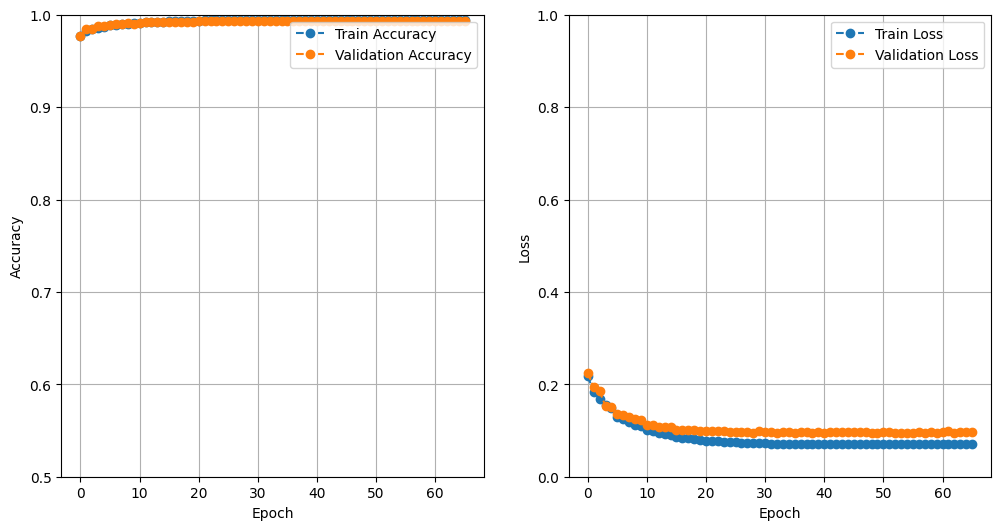

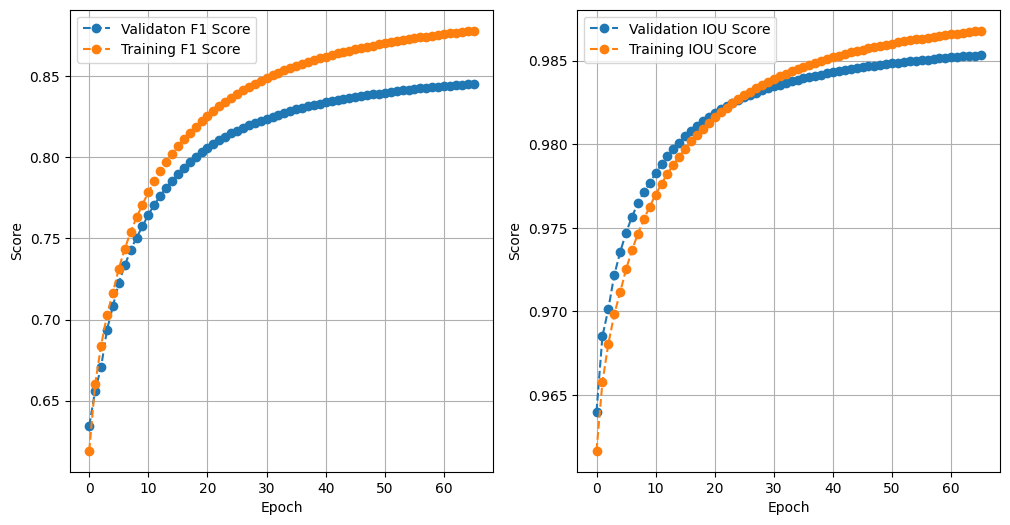

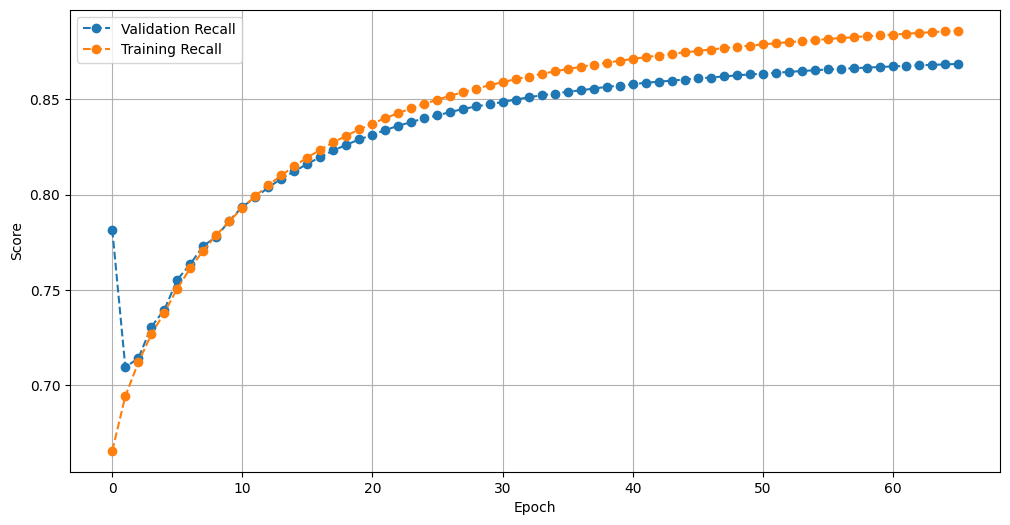

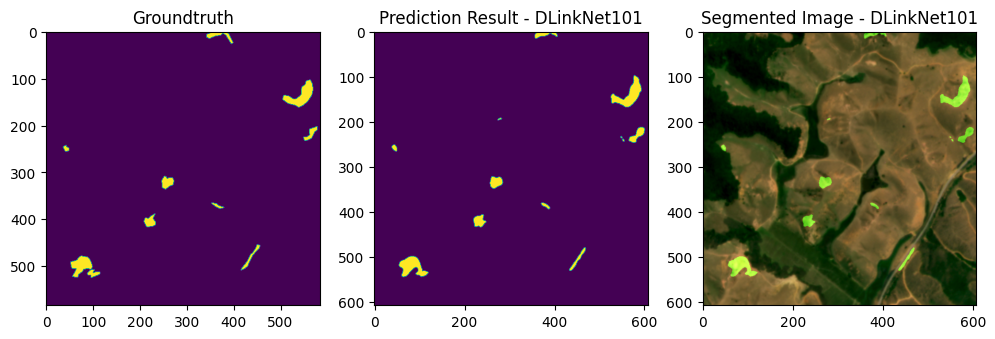

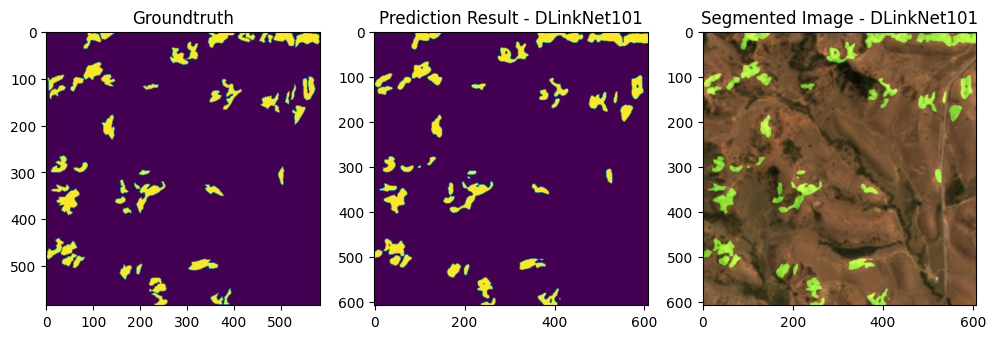

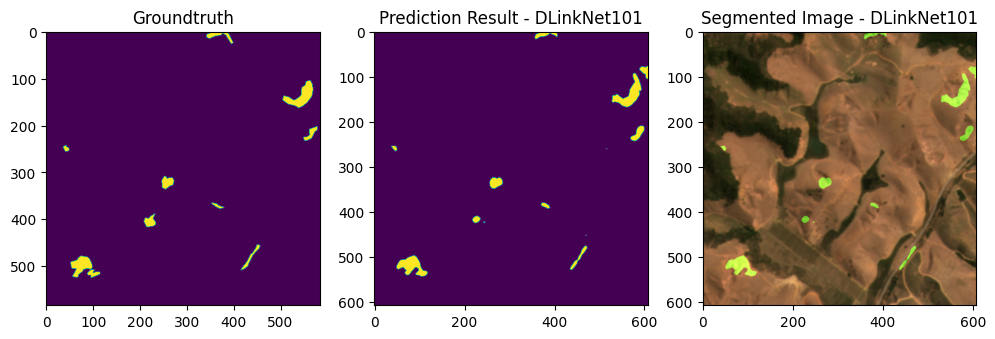

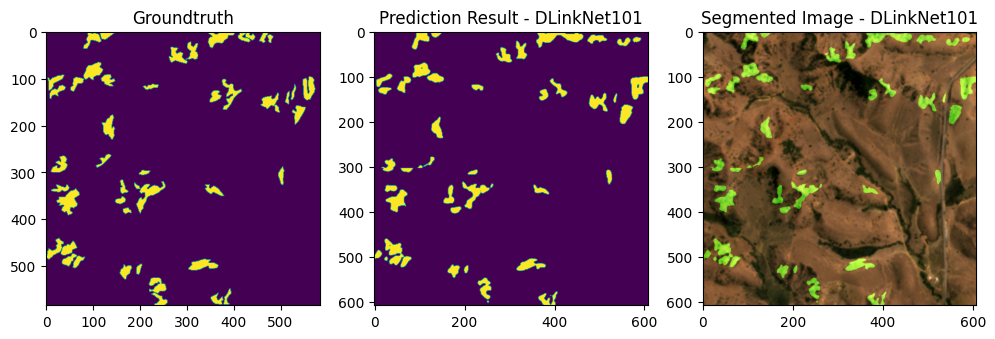

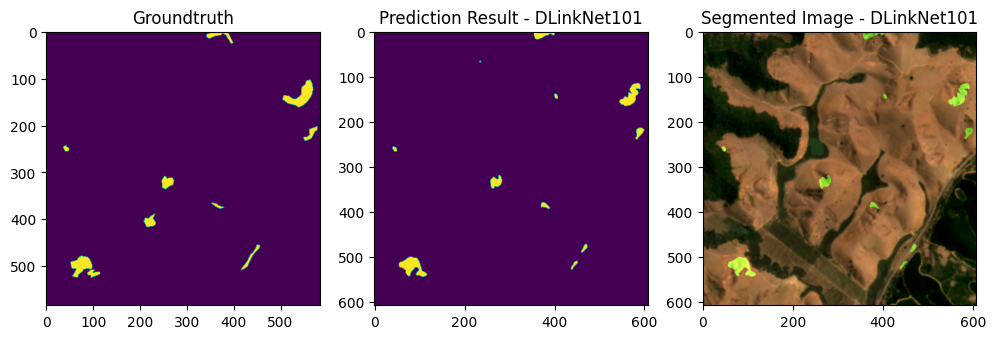

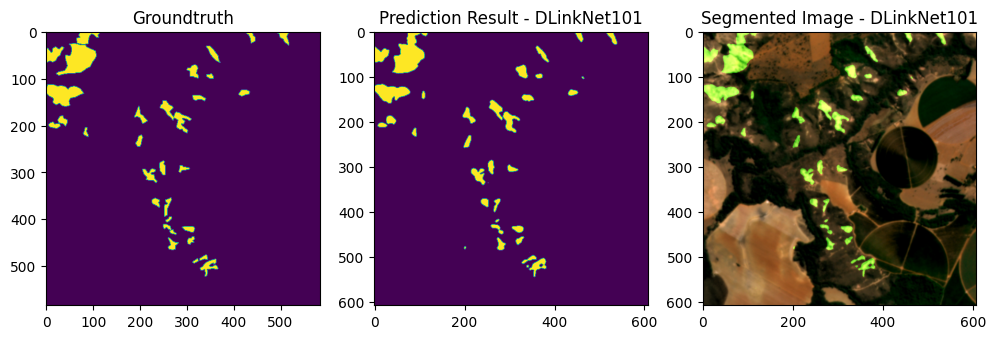

In [ ]:
# %%

if model_loading:
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

if model_training:
    train(
        model,
        training_generator,
        validation_generator,
        loss_func=BCEIoULoss(),
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=10,
    )

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)